# Self-Driving Car Engineer Nanodegree


## Project: **Vehicle Detection & Tracking**

---

In [ ]:
## Output drawing function

In [1]:
def draw_figure(imgs, titles, size=(24, 12), filename='output.jpg'):
    fig, axs = plt.subplots(nrows = len(imgs), ncols = len(imgs[0]), sharex=False, figsize=size)
    for plt_row_index in range(len(imgs)):
        for plt_col_index in range(len(imgs[0])):
            axs[plt_row_index, plt_col_index].imshow(imgs[plt_row_index][plt_col_index])
            axs[plt_row_index, plt_col_index].set_title(titles[plt_row_index][plt_col_index], fontsize=15)
    plt.tight_layout()
    plt.gray()
    fig.savefig(filename)

In [ ]:
## Examples of vehicle and non-vehicle images

Your function returned a count of 8792  cars and 8968  non-cars
of size:  (64, 64, 3)  and data type: float32


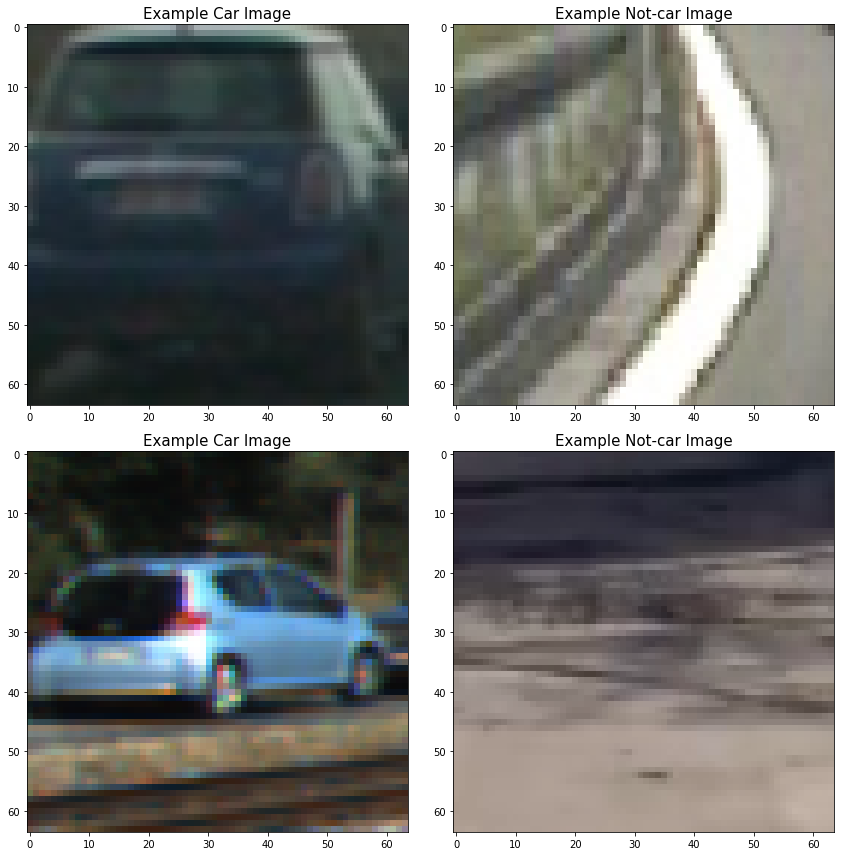

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
%matplotlib inline

cars = glob.glob('vehicles/**/*.png', recursive=True)
notcars = glob.glob('non-vehicles/**/*.png', recursive=True)
        
# Define a function to return some characteristics of the dataset 
def data_look(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    image = mpimg.imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = image.shape#(0, 0, 0)
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = image.dtype
    # Return data_dict
    return data_dict
    
data_info = data_look(cars, notcars)

print('Your function returned a count of', 
      data_info["n_cars"], ' cars and', 
      data_info["n_notcars"], ' non-cars')
print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])

imgs_list = []
imgs_titles = []

# Just for fun choose random car / not-car indices and plot example images   
for index in range(2):
    imgs_list_row = []
    imgs_titles_row = []
    
    car_ind = np.random.randint(0, len(cars))
    notcar_ind = np.random.randint(0, len(notcars))
    
    # Read in car / not-car images
    car_image = mpimg.imread(cars[car_ind])
    notcar_image = mpimg.imread(notcars[notcar_ind])
    
    imgs_list_row.append(car_image)
    imgs_titles_row.append("Example Car Image")
    imgs_list_row.append(notcar_image)
    imgs_titles_row.append("Example Not-car Image")
    imgs_list.append(imgs_list_row)
    imgs_titles.append(imgs_titles_row)

draw_figure(imgs_list, imgs_titles, size=(12, 12), filename="./output_images/car_not_car.png")


In [ ]:
## Features extraction functions

In [3]:
import matplotlib.image as mpimg
import numpy as np
import cv2
from skimage.feature import hog
import pickle
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=False, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=False, 
                       visualise=vis, feature_vector=feature_vec)
        return features

# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# Define a function to compute color histogram features 
# NEED TO CHANGE bins_range if reading .png files with mpimg!
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features


In [ ]:
## HOG from YUV channels exmaples

C:\Users\srogawsk\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


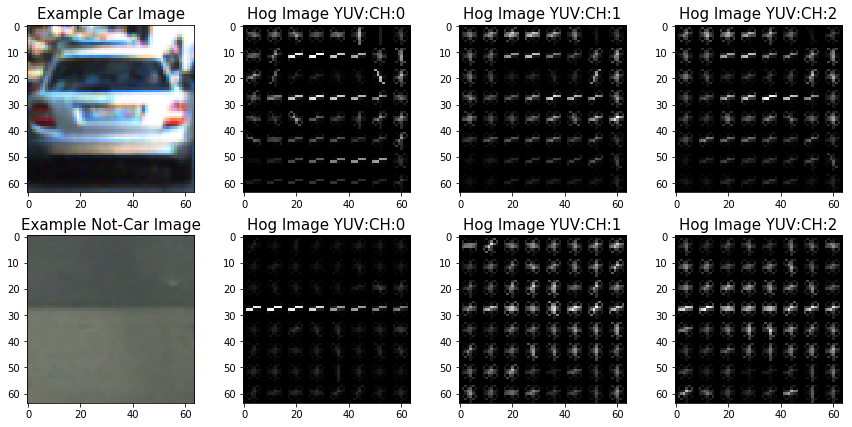

In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from skimage.feature import hog
%matplotlib inline

# Read in our vehicles and non-vehicles
cars = glob.glob('vehicles/**/*.png', recursive=True)
notcars = glob.glob('non-vehicles/**/*.png', recursive=True)
        
imgs_list = []
imgs_titles = []

# Just for fun choose random car / not-car indices and plot example images   
for index in range(0,2):
    imgs_list_row = []
    imgs_titles_row = []
    
    if index == 0:
        # Generate a random index to look at a car image
        ind = np.random.randint(0, len(cars))
        # Read in the image
        image = mpimg.imread(cars[ind])
        # Add image and its name to the appropriate lists
        imgs_list_row.append(image)
        imgs_titles_row.append("Example Car Image")

    elif index == 1:
        # Generate a random index to look at a car image
        ind = np.random.randint(0, len(notcars))
        # Read in the image
        image = mpimg.imread(notcars[ind])     
        # Add image and its name to the appropriate lists
        imgs_list_row.append(image)
        imgs_titles_row.append("Example Not-Car Image")
    
    # Convert image to YUV
    feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    
    for channel in range(image.shape[2]):
        # Define HOG parameters
        features, hog_image = get_hog_features(feature_image[:,:,channel], orient=9, pix_per_cell=8, cell_per_block=2, 
                        vis=True, feature_vec=True)
        imgs_list_row.append(hog_image)
        imgs_titles_row.append("Hog Image YUV:CH:" + str(channel))
    imgs_list.append(imgs_list_row)
    imgs_titles.append(imgs_titles_row)
    
draw_figure(imgs_list, imgs_titles, size=(12, 6), filename="./output_images/HOG_example.jpg")


In [ ]:
## Storing/restoring functions

In [5]:
import pickle
def save_svc(svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    dist_pickle = {}
    dist_pickle["svc"] = svc
    dist_pickle["scaler"] = X_scaler
    dist_pickle["orient"] = orient
    dist_pickle["pix_per_cell"] = pix_per_cell
    dist_pickle["cell_per_block"] = cell_per_block
    dist_pickle["spatial_size"] = spatial_size
    dist_pickle["hist_bins"] = hist_bins
    # save the linear clasifier parameters and results for later use 
    pickle.dump( dist_pickle, open( "svc_pickle.p", "wb" ) )

def load_svc():
    dist_pickle = pickle.load( open("svc_pickle.p", "rb" ) )
    return dist_pickle

In [ ]:
# Feature extraction from the dataset

In [6]:
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
# NOTE: the next import is only valid for scikit-learn version <= 0.17
# for scikit-learn >= 0.18 use:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

cars = glob.glob('vehicles/**/*.png', recursive=True)
notcars = glob.glob('non-vehicles/**/*.png', recursive=True)

color_space = 'YUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 8  # HOG orientations
pix_per_cell = 4 # HOG pixels per cell
cell_per_block = 1 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [None, None] # Min and max in y to search in slide_window()

t=time.time()

car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to extract spatial, histogram and HOG features...')
print (len(cars))
print (len(notcars))

C:\Users\srogawsk\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


299.33 Seconds to extract spatial, histogram and HOG features...


In [ ]:
## Feature normalization

In [7]:
# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)
# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

8792
8968


In [ ]:
## Split up data into randomized training and test sets

In [8]:
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))

Using: 8 orientations 4 pixels per cell and 1 cells per block
Feature vector length: 6960


In [9]:
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')

7.79 Seconds to train SVC...


In [10]:
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

Test Accuracy of SVC =  0.9873
My SVC predicts:  [ 0.  1.  1.  1.  0.  1.  1.  1.  0.  0.]
For these 10 labels:  [ 0.  1.  1.  1.  0.  1.  1.  1.  0.  0.]
0.003 Seconds to predict 10 labels with SVC


In [ ]:
save_svc(svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))

In [ ]:
#Sliding Window Implementation & Search and Clasify

In [11]:
import numpy as np
import cv2
from skimage.feature import hog

def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
    if conv == 'RGB2YUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YUV)

In [ ]:
# Hog sub-sampling window search

In [16]:
import numpy as np
import cv2

# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    
    bboxes = []
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YUV')
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                bboxes.append(((xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)))
    return draw_img, bboxes
    

C:\Users\srogawsk\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Number of bounding boxes: 91


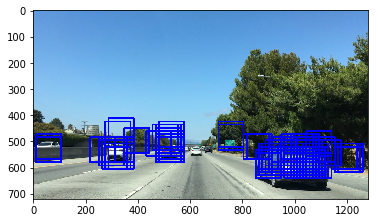

In [17]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

loaded_dist = pickle.load( open("svc_pickle.p", "rb" ) )

svc = loaded_dist["svc"]
X_scaler = loaded_dist["scaler"]
orient = loaded_dist["orient"]
pix_per_cell = loaded_dist["pix_per_cell"]
cell_per_block = loaded_dist["cell_per_block"]
spatial_size = loaded_dist["spatial_size"]
hist_bins = loaded_dist["hist_bins"]

img = mpimg.imread('test_images/bbox-example-image.jpg')

ystart = 400
ystop = 656
scale = 1.5
    
out_img, bboxes = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
print ("Number of bounding boxes: " + str(len(bboxes)))
plt.imshow(out_img)

pickle.dump( bboxes, open( "bbox_pickle.p", "wb" ))

In [ ]:
# Multiple detection & false positives

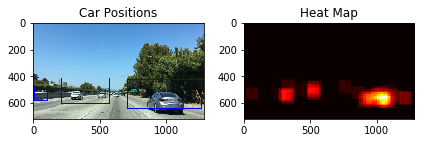

In [13]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
from scipy.ndimage.measurements import label

# Read in a pickle file with bboxes saved
# Each item in the "all_bboxes" list will contain a 
# list of boxes for one of the images shown above
box_list = pickle.load( open( "bbox_pickle.p", "rb" ))

# Read in image similar to one shown above 
image = mpimg.imread('test_images/bbox-example-image.jpg')
heat = np.zeros_like(image[:,:,0]).astype(np.float)

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

# Add heat to each box in box list
heat = add_heat(heat,box_list)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat,0)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(image), labels)

fig = plt.figure()
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()


In [ ]:
##Image processing pipeline

C:\Users\srogawsk\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


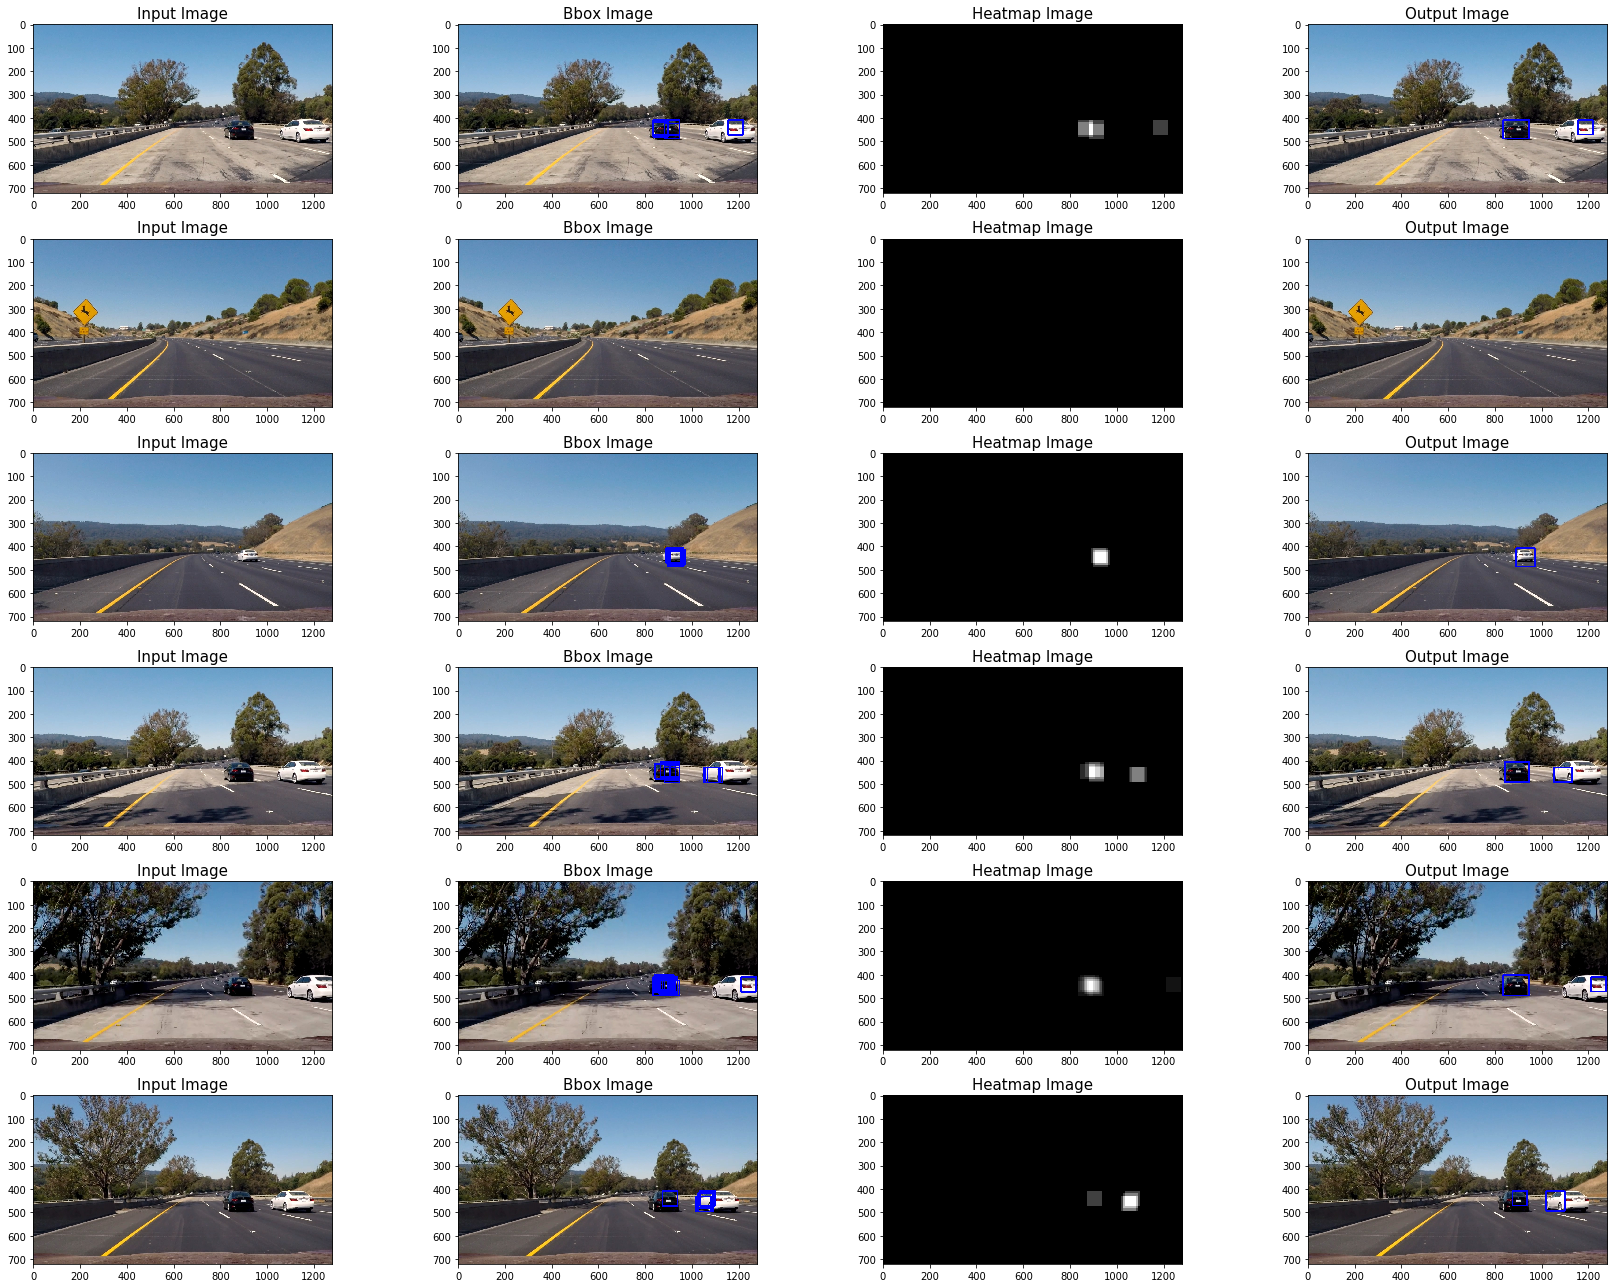

In [14]:
import glob
%matplotlib inline

# Edit this function to create your own pipeline.
def pipeline(img):
 
    ystart = 400
    ystop = 656
    scale = 1
    window_img, bboxes = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

    heat = np.zeros_like(img[:,:,0]).astype(np.float)
    # Add heat to each box in box list
    heat = add_heat(heat, bboxes)
    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,0)
    # Visualize the heatmap when displaying    
    heatmap_img = np.clip(heat, 0, 255)
    # Find final boxes from heatmap using label function
    labels = label(heatmap_img)
    out_img = draw_labeled_bboxes(np.copy(img), labels)    
    return out_img, heatmap_img, window_img 

test_file_names = glob.glob('test_images/test*.jpg')

input_img_list = []
window_img_list = []
heatmap_img_list = []
output_img_list = []

img_list = []
img_titles = []

for test_file_name in test_file_names:
    img_list_temp = []
    img_titles_temp = []
    
    image = mpimg.imread(test_file_name)
    
    img_list_temp.append(image)
    img_titles_temp.append("Input Image")
    
    output_img, heatmap_img, window_img = pipeline(image)

    img_list_temp.append(window_img)
    img_titles_temp.append("Bbox Image")
    img_list_temp.append(heatmap_img)
    img_titles_temp.append("Heatmap Image")
    img_list_temp.append(output_img)
    img_titles_temp.append("Output Image")

    img_list.append(img_list_temp)
    img_titles.append(img_titles_temp)
    
# for visualization
draw_figure(img_list, img_titles , size=(24, 18), filename='./output_images/output.jpg')


In [ ]:
# Multiscales pipeline

In [ ]:
import glob
import time
%matplotlib inline

def heatmap_output(img, bboxes, threshold=0):
    heat = np.zeros_like(img[:,:,0]).astype(np.float)
    # Add heat to each box in box list
    heat = add_heat(heat, bboxes)
    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,threshold)
    # Visualize the heatmap when displaying    
    heatmap_img = np.clip(heat, 0, 255)
    # Find final boxes from heatmap using label function
    labels = label(heatmap_img)
    out_img = draw_labeled_bboxes(np.copy(img), labels)    
    return out_img, heatmap_img

# Edit this function to create your own pipeline.
def pipeline(img, ystart=400, ystop=656, scale=1, threshold=0):
    window_img, bboxes = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    print (len(bboxes))
    out_img, heatmap_img = heatmap_output(img, bboxes, threshold) 
    return out_img, heatmap_img, window_img 

test_file_names = glob.glob('test_images/test*.jpg')

input_img_list = []
window_img_list = []
heatmap_img_list = []
output_img_list = []

img_list = []
img_titles = []

for test_file_name in test_file_names:
 
    image = mpimg.imread(test_file_name)
    
    scales = [1]
    thresholds = [0]
    for scale in scales:
        for threshold in thresholds:
            img_list_temp = []
            img_titles_temp = []

            img_list_temp.append(image)
            img_titles_temp.append("Input Image with scale: " + str(scale) + " and threshold: " + str(threshold))

            t = time.time()
            output_img, heatmap_img, window_img = pipeline(image, ystart=400, ystop=550, scale=scale, threshold=threshold)

            t2 = time.time()
            print(round(t2-t, 5), 'Seconds to predict')

            img_list_temp.append(window_img)
            img_titles_temp.append("Bbox Image")
            img_list_temp.append(heatmap_img)
            img_titles_temp.append("Heatmap Image")
            img_list_temp.append(output_img)
            img_titles_temp.append("Output Image")

            img_list.append(img_list_temp)
            img_titles.append(img_titles_temp)

# for visualization
draw_figure(img_list, img_titles , size=(24, 18), filename='./output_images/multi_output.jpg')


In [ ]:
# mean for heatmaps

In [ ]:
import glob
import time
%matplotlib inline

def heatmap_output(img, bboxes, threshold=0):
    heat = np.zeros_like(img[:,:,0]).astype(np.float)
    # Add heat to each box in box list
    heat = add_heat(heat, bboxes)
    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,threshold)
    # Visualize the heatmap when displaying    
    heatmap_img = np.clip(heat, 0, 255)
    # Find final boxes from heatmap using label function
    labels = label(heatmap_img)
    print (labels[1])
    out_img = draw_labeled_bboxes(np.copy(img), labels)    
    return out_img, heatmap_img

# Edit this function to create your own pipeline.
def pipeline(img, ystart=400, ystop=656, scale=1, threshold=0):
    window_img, bboxes1 = find_cars(img, 400, 500, 0.9, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    window_img, bboxes2 = find_cars(img, ystart, ystop, 1.5, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    window_img, bboxes3 = find_cars(img, ystart, ystop, 2, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    bboxes = bboxes1 + bboxes2 + bboxes3
    print (len(bboxes))
    
    out_img, heatmap_img = heatmap_output(img, bboxes, threshold=9) 
    return out_img, heatmap_img, window_img 

test_file_names = glob.glob('test_images/test*.jpg')

input_img_list = []
window_img_list = []
heatmap_img_list = []
output_img_list = []

img_list = []
img_titles = []

for test_file_name in test_file_names:
 
    image = mpimg.imread(test_file_name)
    
    scales = [1]
    thresholds = [0]
    for scale in scales:
        for threshold in thresholds:
            img_list_temp = []
            img_titles_temp = []

            img_list_temp.append(image)
            img_titles_temp.append("Input Image with scale: " + str(scale) + " and threshold: " + str(threshold))

            t = time.time()
            output_img, heatmap_img, window_img = pipeline(image, ystart=400, ystop=550, scale=scale, threshold=threshold)

            t2 = time.time()
            print(round(t2-t, 5), 'Seconds to predict')

            img_list_temp.append(window_img)
            img_titles_temp.append("Bbox Image")
            img_list_temp.append(heatmap_img)
            img_titles_temp.append("Heatmap Image")
            img_list_temp.append(output_img)
            img_titles_temp.append("Output Image")

            img_list.append(img_list_temp)
            img_titles.append(img_titles_temp)

# for visualization
draw_figure(img_list, img_titles , size=(24, 18), filename='./output_images/multi_output.jpg')

In [ ]:
# TEST PICTURE pipeline

In [ ]:
import glob
import time
%matplotlib inline

def heatmap_output(img, bboxes, threshold=0):
    heat = np.zeros_like(img[:,:,0]).astype(np.float)
    # Add heat to each box in box list
    heat = add_heat(heat, bboxes)
    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,threshold)
    # Visualize the heatmap when displaying    
    heatmap_img = np.clip(heat, 0, 255)
    # Find final boxes from heatmap using label function
    labels = label(heatmap_img)
    print (labels[1])
    out_img = draw_labeled_bboxes(np.copy(img), labels)    
    return out_img, heatmap_img

# Edit this function to create your own pipeline.
def pipeline(img, ystart=400, ystop=656, scale=1, threshold=0):
    window_img, bboxes1 = find_cars(img, ystart, ystop, 1, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    window_img, bboxes2 = find_cars(img, ystart, ystop, 2, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    bboxes = bboxes1 + bboxes2
    print (len(bboxes))
    
    out_img, heatmap_img = heatmap_output(img, bboxes, threshold=1) 
    return out_img, heatmap_img, window_img 

test_file_names = glob.glob('test_images/test*.jpg')

input_img_list = []
window_img_list = []
heatmap_img_list = []
output_img_list = []

img_list = []
img_titles = []

for test_file_name in test_file_names:
 
    image = mpimg.imread(test_file_name)
    
    scales = [1]
    thresholds = [0]
    for scale in scales:
        for threshold in thresholds:
            img_list_temp = []
            img_titles_temp = []

            img_list_temp.append(image)
            img_titles_temp.append("Input Image with scale: " + str(scale) + " and threshold: " + str(threshold))

            t = time.time()
            output_img, heatmap_img, window_img = pipeline(image, ystart=400, ystop=550, scale=scale, threshold=threshold)

            t2 = time.time()
            print(round(t2-t, 5), 'Seconds to predict')

            img_list_temp.append(window_img)
            img_titles_temp.append("Bbox Image")
            img_list_temp.append(heatmap_img)
            img_titles_temp.append("Heatmap Image")
            img_list_temp.append(output_img)
            img_titles_temp.append("Output Image")

            img_list.append(img_list_temp)
            img_titles.append(img_titles_temp)

# for visualization
draw_figure(img_list, img_titles , size=(24, 18), filename='./output_images/multi_output.jpg')

In [ ]:
# VIDEO PIPELINE

In [ ]:
import glob
import time
%matplotlib inline

def heatmap_output(img, bboxes, threshold=0):
    heat = np.zeros_like(img[:,:,0]).astype(np.float)
    # Add heat to each box in box list
    heat = add_heat(heat, bboxes)
    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,threshold)
    # Visualize the heatmap when displaying    
    heatmap_img = np.clip(heat, 0, 255)
    # Find final boxes from heatmap using label function
    labels = label(heatmap_img)
    print (labels[1])
    out_img = draw_labeled_bboxes(np.copy(img), labels)    
    return out_img, heatmap_img

class BoundingBoxTracker():
    def __init__(self, limit):
        print ("Init")
        self.bbox_list = []
        self.bbox_num = []
        self.limit = limit
    def push(self, bboxes):
        if len(self.bbox_list) >= self.limit:
            self.pop(0)
        self.bbox_list.append(bboxes)
        print ("Before "+ str(len(self.bbox_num)))
        self.bbox_num.append(len(bboxes))
        print ("After " + str(len(self.bbox_num)))
    def pop(self, index):
        self.bbox_list.pop(index)
        self.bbox_num.pop(index)
    def get_state(self):
        return self.bbox_list, len(self.bbox_num)
    def clean(self):
        self.__init__()

# Edit this function to create your own pipeline.
def pipeline(img, bbtracker, ystart=400, ystop=656, scale=1, threshold=0):
    window_img, bboxes1 = find_cars(img, ystart, 464, 1, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    #window_img, bboxes2 = find_cars(img, 450, 550, 1.5, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    #window_img, bboxes3 = find_cars(img, 400, ystop, 2, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    #bboxes = bboxes1 + bboxes2 + bboxes3
    bboxes = bboxes1 + bboxes2
    print ("Number of bboxes: " + str(len(bboxes)))
    
    bbtracker.push(bboxes)
    
    bb_list, bb_num = bbtracker.get_state()
    bbout = []
    for bbox in bb_list:
        bbout += bbox
    print ("Number of bboxes:", str(len(bbout)))
    #out_img, heatmap_img = heatmap_output(img, bbout, threshold=bb_num-1) 
    out_img, heatmap_img = heatmap_output(img, bbout, threshold=1) 
    
    return out_img, heatmap_img, window_img 

test_file_names = glob.glob('test_images/test*.jpg')

input_img_list = []
window_img_list = []
heatmap_img_list = []
output_img_list = []

img_list = []
img_titles = []
bbtracker = BoundingBoxTracker(5)

for test_file_name in test_file_names:
 
    image = mpimg.imread(test_file_name)
   
    scales = [1]
    thresholds = [0]
    for scale in scales:
        for threshold in thresholds:
            img_list_temp = []
            img_titles_temp = []

            img_list_temp.append(image)
            img_titles_temp.append("Input Image with scale: " + str(scale) + " and threshold: " + str(threshold))

            t = time.time()
            
            output_img, heatmap_img, window_img = pipeline(image, bbtracker, ystart=400, ystop=550, scale=scale, threshold=threshold)

            bb, num = bbtracker.get_state()
            print ("Number of bbox entries in tracker: " + str(num))
            t2 = time.time()
            print(round(t2-t, 5), 'Seconds to predict')

            img_list_temp.append(window_img)
            img_titles_temp.append("Bbox Image")
            img_list_temp.append(heatmap_img)
            img_titles_temp.append("Heatmap Image")
            img_list_temp.append(output_img)
            img_titles_temp.append("Output Image")

            img_list.append(img_list_temp)
            img_titles.append(img_titles_temp)

# for visualization
draw_figure(img_list, img_titles , size=(24, 18), filename='./output_images/multi_output.jpg')

In [ ]:
## Test on Videos

In [ ]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [ ]:
bbtracker = BoundingBoxTracker(10)
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    output_img, heatmap_img, window_img = pipeline(image, bbtracker, ystart=400, ystop=656, scale=2, threshold=0)
    return output_img

In [ ]:
white_output = './project_video_out_out.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("./project_video_out.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))